In [256]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# info

In [257]:
# Load the dataset
football_data = pd.read_csv("football.csv")

# Display the first few rows of the dataset
print(football_data.head(4))

  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                  medium   
1                      3                      0                  medium   
2                      6                      2                     low   
3                      4                      1                  medium   

   minute  second          outcome  
0      70       9             goal  
1      55       4  saved by keeper  
2      86      31  saved by keeper  
3      77       2    missed chance  


In [258]:
# Check the data types and missing values
print(football_data.info(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   matchId                  8925 non-null   object 
 1   playerId                 8925 non-null   object 
 2   playType                 8925 non-null   object 
 3   bodyPart                 8925 non-null   object 
 4   x                        8925 non-null   float64
 5   y                        8925 non-null   float64
 6   intervening Opponents    8925 non-null   int64  
 7   intervening Teammates    8925 non-null   int64  
 8   interference On Shooter  8891 non-null   object 
 9   minute                   8925 non-null   int64  
 10  second                   8925 non-null   int64  
 11  outcome                  8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB
None


In [259]:
# Summary statistics for numerical features
print(football_data.describe())

                 x            y  intervening Opponents  intervening Teammates  \
count  8925.000000  8925.000000            8925.000000            8925.000000   
mean     14.564631     0.364408               2.531989               0.336471   
std       7.841865     8.999063               1.386693               0.680175   
min       0.000000   -33.920000               0.000000               0.000000   
25%       8.480000    -5.740000               2.000000               0.000000   
50%      12.470000     0.500000               2.000000               0.000000   
75%      20.950000     6.730000               3.000000               0.000000   
max      70.820000    33.920000              11.000000               7.000000   

            minute       second  
count  8925.000000  8925.000000  
mean     48.541401    29.243810  
std      26.397998    17.306565  
min       0.000000     0.000000  
25%      26.000000    14.000000  
50%      49.000000    29.000000  
75%      71.000000    44.000000 

In [260]:
# Check for missing values
print(football_data.isnull().sum())

matchId                     0
playerId                    0
playType                    0
bodyPart                    0
x                           0
y                           0
intervening Opponents       0
intervening Teammates       0
interference On Shooter    34
minute                      0
second                      0
outcome                    34
dtype: int64


# delete rows with missing value

In [261]:
# Remove rows with missing values
football_data_cleaned = football_data.dropna()

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", football_data_cleaned.shape)


Shape of cleaned dataset: (8891, 12)


# Map interference On Shooter to numerical

In [262]:
# Find unique values of the "outcome" column
unique_interference = football_data_cleaned['interference On Shooter'].unique()

# Print the unique values
print("Unique interference:", unique_interference)

Unique interference: ['medium' 'low' 'high']


In [263]:
# Map categorical values to numerical values
interference_mapping = {'low': 1, 'medium': 2, 'high': 3}
football_data_cleaned.loc[:, 'interference On Shooter'] = football_data_cleaned['interference On Shooter'].map(interference_mapping)

# Check the mapping result
print(football_data_cleaned['interference On Shooter'].value_counts())

interference On Shooter
2    4186
1    3315
3    1390
Name: count, dtype: int64


# basic statistical analysis

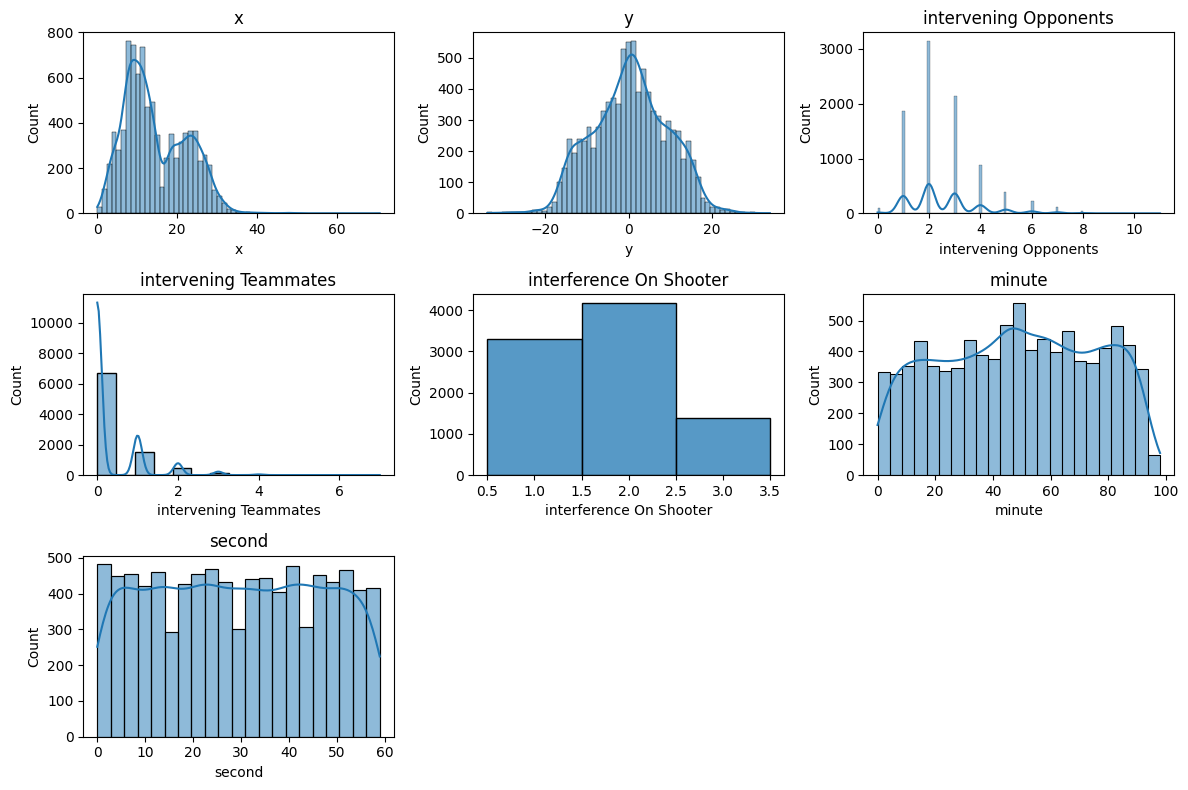

In [286]:
# Select numerical features for analysis
numerical_features = ['x', 'y', 'intervening Opponents', 'intervening Teammates', 'interference On Shooter', 'minute', 'second']

# Visualize distributions of numerical features
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Loop through each numerical feature to create histograms
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    if feature == 'interference On Shooter':
        # Exclude fractional values from the histogram
        bins = [0.5, 1.5, 2.5, 3.5]
        sns.histplot(football_data_cleaned[feature], kde=False, bins=bins)
    else:
        sns.histplot(football_data_cleaned[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()



# Distribution of Shot Outcomes

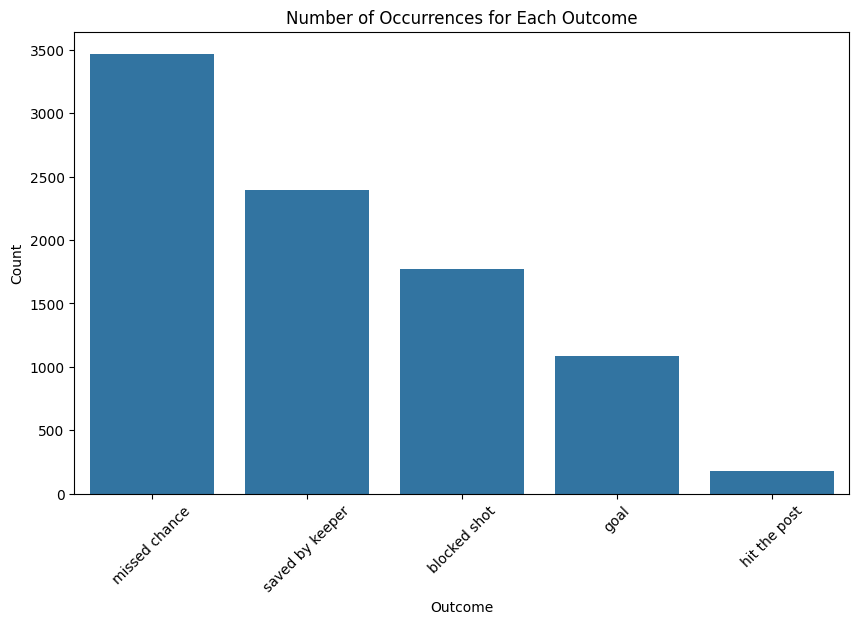

In [265]:
# Get the count of each unique value in the "outcome" column
outcome_counts = football_data_cleaned['outcome'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the counts of each unique value in the "outcome" column
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Shot Outcomes')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


# feature engineering techniques

# Add success 

In [266]:
# Find unique values of the "outcome" column
unique_outcomes = football_data_cleaned['outcome'].unique()

# Print the unique values
print("Unique outcomes:", unique_outcomes)

Unique outcomes: ['goal' 'saved by keeper' 'missed chance' 'blocked shot' 'hit the post']


In [287]:
# Create a new column "success" based on the values of the "outcome" column
football_data_cleaned.loc[:, 'success'] = (football_data_cleaned['outcome'] == 'goal').astype(int)

# Display the first few rows of the dataset with the new column
print(football_data_cleaned.head())

  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   
4   m_117      p_9  open play  right foot  10.72   5.24   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                       2   
1                      3                      0                       2   
2                      6                      2                       1   
3                      4                      1                       2   
4                      2                      0                       2   

   minute  second          outcome  success   distance      angle  x zone  \
0      70       9             goal        1  17.530810  18.544088       2   
1      55       4  saved by keeper      

# Add distance

In [268]:
# Calculate distance using the provided formula
football_data_cleaned.loc[:, 'distance'] = np.sqrt(football_data_cleaned['x']**2 + football_data_cleaned['y']**2)

# Display the first few rows of the dataset with the new column
print(football_data_cleaned.head())


  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   
4   m_117      p_9  open play  right foot  10.72   5.24   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                       2   
1                      3                      0                       2   
2                      6                      2                       1   
3                      4                      1                       2   
4                      2                      0                       2   

   minute  second          outcome  success   distance  
0      70       9             goal        1  17.530810  
1      55       4  saved by keeper        0  17.090313  
2      86      31  save

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\3852779688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_data_cleaned.loc[:, 'distance'] = np.sqrt(football_data_cleaned['x']**2 + football_data_cleaned['y']**2)


# Add angle

In [269]:
# Calculate theta using the provided formula
theta = np.arctan(7.32 * football_data_cleaned['x'] / (football_data_cleaned['x']**2 + football_data_cleaned['y']**2 - (7.32/2)**2))

# Convert theta to degrees
angle = np.rad2deg(theta)

# Add the angle column to the DataFrame using .loc accessor
football_data_cleaned.loc[:, 'angle'] = angle

# Display the first few rows of the dataset with the new column
print(football_data_cleaned.head())

  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   
4   m_117      p_9  open play  right foot  10.72   5.24   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                       2   
1                      3                      0                       2   
2                      6                      2                       1   
3                      4                      1                       2   
4                      2                      0                       2   

   minute  second          outcome  success   distance      angle  
0      70       9             goal        1  17.530810  18.544088  
1      55       4  saved by keeper        0  17.090313  13

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\3301582243.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_data_cleaned.loc[:, 'angle'] = angle


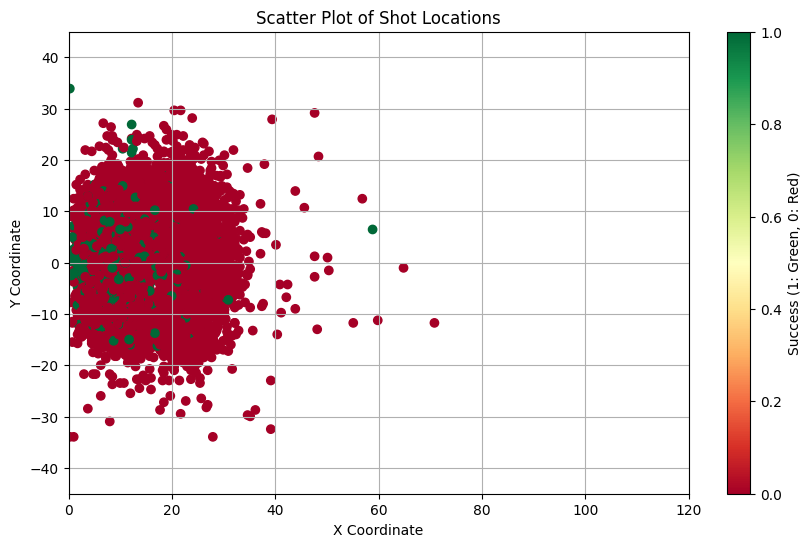

In [270]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the scatter plot for x and y coordinates
plt.scatter(football_data_cleaned['x'], football_data_cleaned['y'], c=football_data_cleaned['success'], cmap='RdYlGn')

# Set the x and y axis limits
plt.xlim(0, 120)
plt.ylim(-45, 45)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Shot Locations')

# Add color bar legend
plt.colorbar(label='Success (1: Green, 0: Red)')

# Show plot
plt.grid(True)
plt.show()


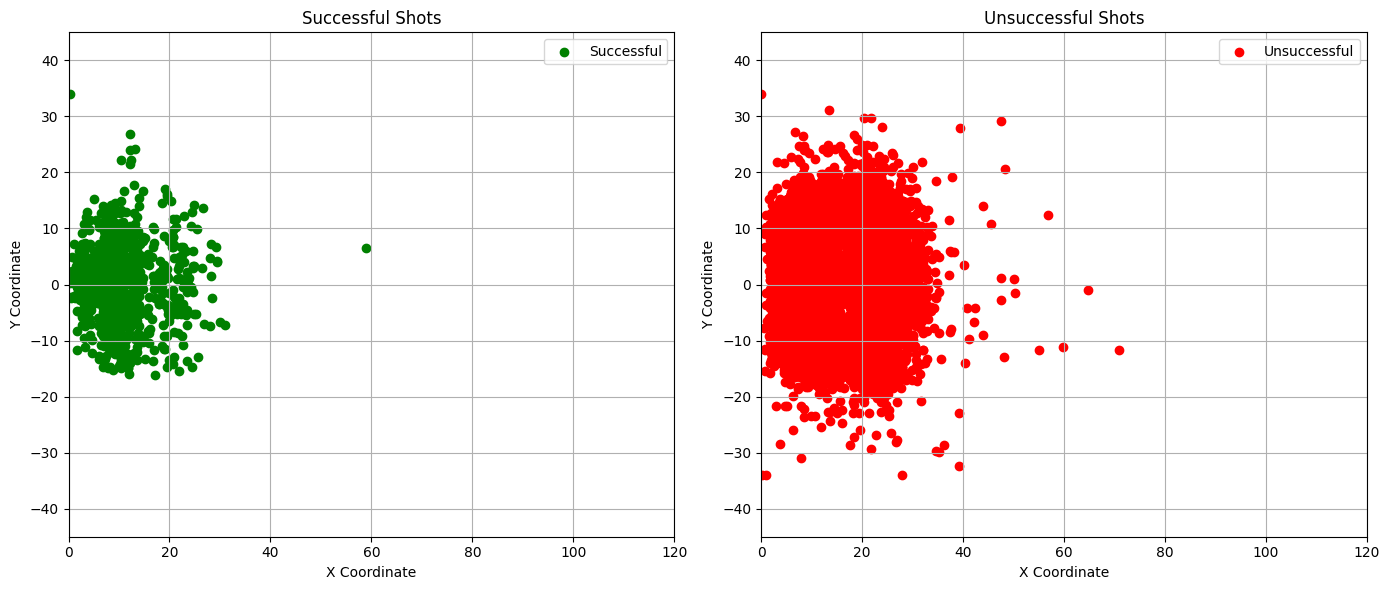

In [271]:
# Filter successful shots
successful_shots = football_data_cleaned[football_data_cleaned['success'] == 1]
# Filter unsuccessful shots
unsuccessful_shots = football_data_cleaned[football_data_cleaned['success'] == 0]

# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot successful shots
axes[0].scatter(successful_shots['x'], successful_shots['y'], color='green', label='Successful')
axes[0].set_title('Successful Shots')
axes[0].set_xlabel('X Coordinate')
axes[0].set_ylabel('Y Coordinate')
axes[0].set_xlim(0, 120)
axes[0].set_ylim(-45, 45)
axes[0].grid(True)

# Plot unsuccessful shots
axes[1].scatter(unsuccessful_shots['x'], unsuccessful_shots['y'], color='red', label='Unsuccessful')
axes[1].set_title('Unsuccessful Shots')
axes[1].set_xlabel('X Coordinate')
axes[1].set_ylabel('Y Coordinate')
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-45, 45)
axes[1].grid(True)

# Add legend
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()


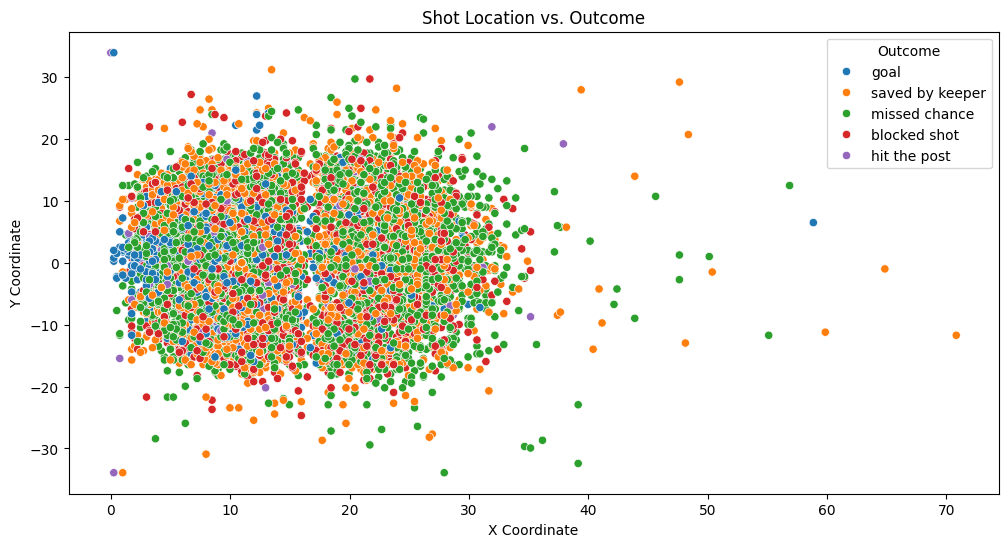

In [272]:
# Relationships with the Target Variable
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x', y='y', hue='outcome', data=football_data_cleaned)
plt.title('Shot Location vs. Outcome')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Outcome')
plt.show()

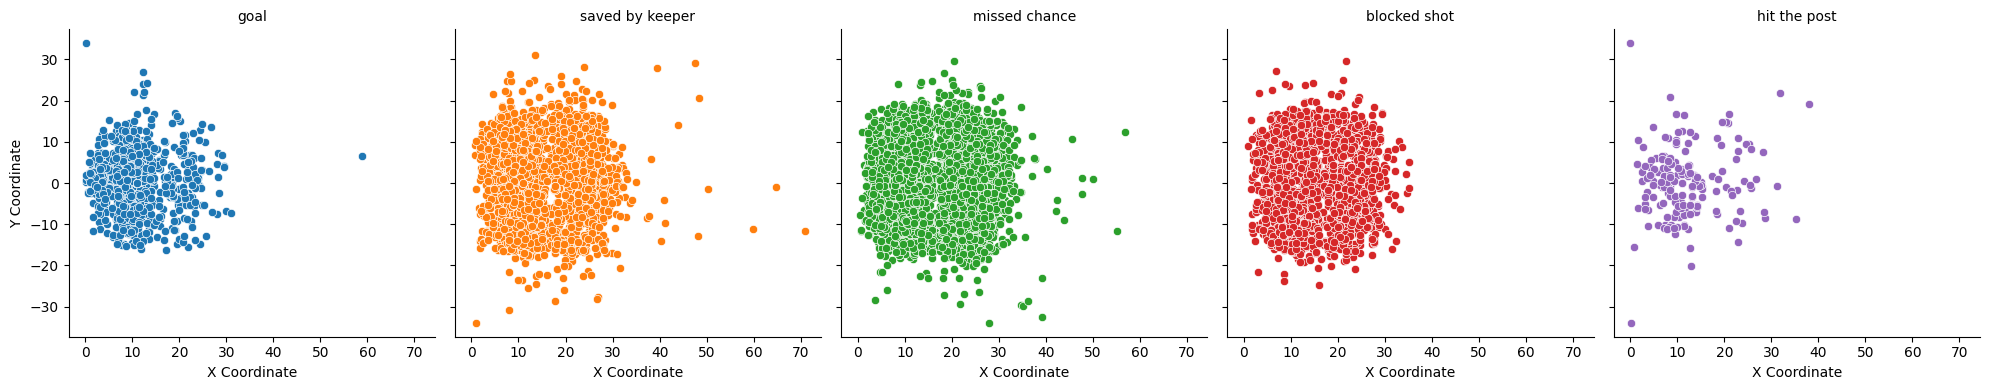

In [273]:
# Create a FacetGrid
g = sns.FacetGrid(football_data, col="outcome", hue="outcome", col_wrap=5, height=4)

# Map scatterplot onto the grid
g.map(sns.scatterplot, "x", "y")

# Set titles and axis labels
g.set_titles("{col_name}")
g.set_axis_labels("X Coordinate", "Y Coordinate")

plt.show()


# Add x zone

In [274]:
# Define the conditions and corresponding values for x zones
conditions = [
    (football_data_cleaned['x'] < 5.5),
    (football_data_cleaned['x'] >= 5.5) & (football_data_cleaned['x'] < 16.5),
    (football_data_cleaned['x'] >= 16.5) & (football_data_cleaned['x'] < 120)
]
values = [3, 2, 1]

# Add the "x zone" column to football_data_cleaned based on the conditions and values
football_data_cleaned.loc[:, 'x zone'] = np.select(conditions, values, default=np.nan).astype(int)

# Display the updated DataFrame
print(football_data_cleaned.head())


  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   
4   m_117      p_9  open play  right foot  10.72   5.24   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                       2   
1                      3                      0                       2   
2                      6                      2                       1   
3                      4                      1                       2   
4                      2                      0                       2   

   minute  second          outcome  success   distance      angle  x zone  
0      70       9             goal        1  17.530810  18.544088       2  
1      55       4  saved by keeper        

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\85440632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_data_cleaned.loc[:, 'x zone'] = np.select(conditions, values, default=np.nan).astype(int)


# Add y zone

In [275]:
# Define the conditions and corresponding values for y zones
conditions_y = [
    (abs(football_data_cleaned['y']) < 9.1),
    (abs(football_data_cleaned['y']) >= 9.1) & (abs(football_data_cleaned['y']) < 20.1),
    (abs(football_data_cleaned['y']) >= 20.1) & (abs(football_data_cleaned['y']) < 45)
]
values_y = [3, 2, 1]

# Add the "y zone" column to football_data_cleaned based on the conditions and values
football_data_cleaned.loc[:, 'y zone'] = np.select(conditions_y, values_y, default=np.nan).astype(int)

# Display the updated DataFrame
print(football_data_cleaned.head())


  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   
4   m_117      p_9  open play  right foot  10.72   5.24   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                       2   
1                      3                      0                       2   
2                      6                      2                       1   
3                      4                      1                       2   
4                      2                      0                       2   

   minute  second          outcome  success   distance      angle  x zone  \
0      70       9             goal        1  17.530810  18.544088       2   
1      55       4  saved by keeper      

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\4089668805.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_data_cleaned.loc[:, 'y zone'] = np.select(conditions_y, values_y, default=np.nan).astype(int)


# Add numerical playType and bodyPart      

In [276]:
# Unique values of playType
unique_playType = football_data_cleaned['playType'].unique()

# Unique values of bodyPart
unique_bodyPart = football_data_cleaned['bodyPart'].unique()

print("Unique playType values:", unique_playType)
print("Unique bodyPart values:", unique_bodyPart)


Unique playType values: ['open play' 'free kick' 'penalty' 'olimpico']
Unique bodyPart values: ['right foot' 'left foot' 'head' 'other']


In [277]:
# Define mappings for playType
playType_mapping = {'open play': 1, 'free kick': 2, 'penalty': 3, 'olimpico': 4}

# Map playType to numerical values using .loc
football_data_cleaned.loc[:, 'playType_numeric'] = football_data_cleaned['playType'].map(playType_mapping).astype(int)

# Define mappings for bodyPart
bodyPart_mapping = {'right foot': 1, 'left foot': 2, 'head': 3, 'other': 4}

# Map bodyPart to numerical values using .loc
football_data_cleaned.loc[:, 'bodyPart_numeric'] = football_data_cleaned['bodyPart'].map(bodyPart_mapping).astype(int)

print(football_data_cleaned.head(4))


  matchId playerId   playType    bodyPart      x      y  \
0    m_91    p_103  open play  right foot  13.47 -11.22   
1    m_17     p_16  open play   left foot   9.48  14.22   
2   m_111     p_88  free kick   left foot  29.43  -1.25   
3   m_142     p_87  open play  right foot  26.93   1.00   

   intervening Opponents  intervening Teammates interference On Shooter  \
0                      1                      0                       2   
1                      3                      0                       2   
2                      6                      2                       1   
3                      4                      1                       2   

   minute  second          outcome  success   distance      angle  x zone  \
0      70       9             goal        1  17.530810  18.544088       2   
1      55       4  saved by keeper        0  17.090313  13.982592       2   
2      86      31  saved by keeper        0  29.456534  14.153255       1   
3      77       2   

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\2064594316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_data_cleaned.loc[:, 'playType_numeric'] = football_data_cleaned['playType'].map(playType_mapping).astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11880\2064594316.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_data_cleaned.loc[:, 'bodyPart_numeric'] = football_data_cleaned['bodyPart'].map(bodyPart_mapping).astype(int)


# Plot heatmap correlation

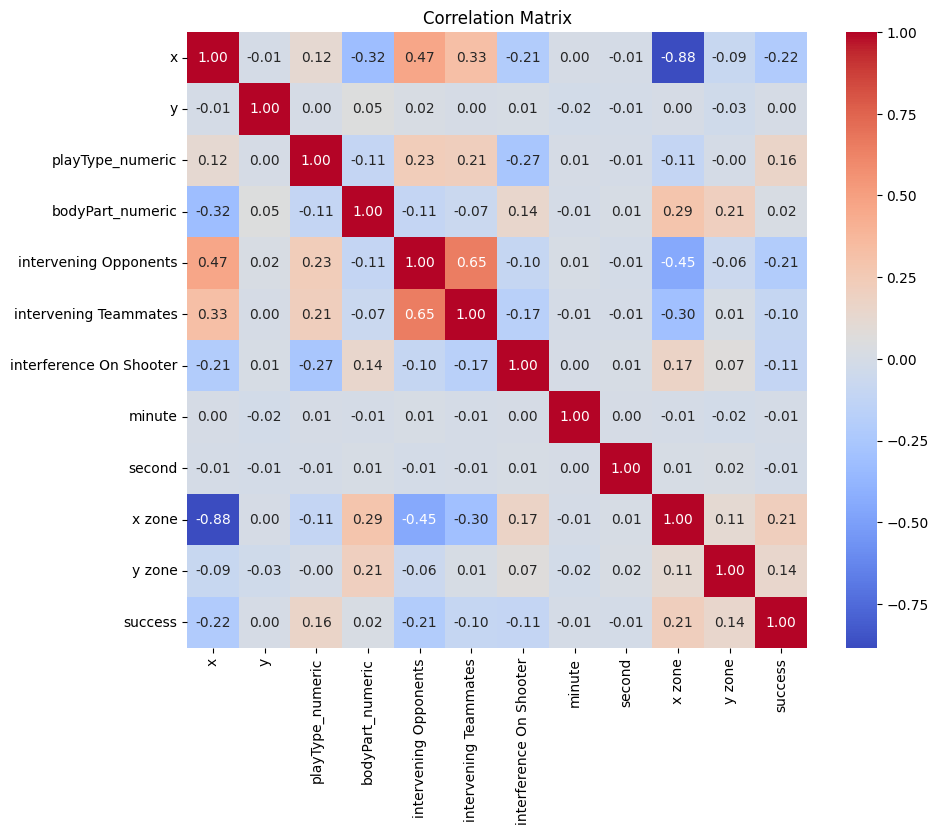

In [278]:
# update numerical_features
numerical_features = ['x', 'y', 'playType_numeric',  'bodyPart_numeric', 'intervening Opponents', 'intervening Teammates', 'interference On Shooter', 'minute', 'second', 'x zone', 'y zone', 'success']

# Correlation Analysis
correlation_matrix = football_data_cleaned[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# train an arbitrary model using preprocessed data

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = football_data_cleaned[['x', 'y', 'intervening Opponents', 'intervening Teammates', 'interference On Shooter', 'minute', 'second', 'x zone', 'y zone']]
y = football_data_cleaned['success']  # Assuming 'success' is the target variable indicating whether the shot resulted in a goal (1) or not (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8819561551433389


# mutual information method to assess the importance of each feature

In [280]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Calculate mutual information between features and target variable
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a pandas DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mi_scores})

# Sort the DataFrame in descending order based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importance_df)


                   Feature  Importance
2    intervening Opponents    0.035458
0                        x    0.032104
1                        y    0.027370
7                   x zone    0.025289
8                   y zone    0.016724
3    intervening Teammates    0.007657
4  interference On Shooter    0.004760
5                   minute    0.002503
6                   second    0.002097


# Univariate Feature Selection:ANOVA 

In [281]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest with ANOVA for numerical features
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_numerical = football_data_cleaned[numerical_features]
y = football_data_cleaned['outcome']
X_selected = selector.fit_transform(X_numerical, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X_numerical.columns[selected_indices]

print("Selected Features (Univariate Feature Selection):", selected_features)


Selected Features (Univariate Feature Selection): Index(['x', 'playType_numeric', 'intervening Opponents', 'x zone', 'success'], dtype='object')


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


# Feature Importance from Models (using Random Forest as an example):

In [282]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_numerical, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X_numerical.columns[sorted_indices]

print("Feature Importances (Random Forest):", sorted_features)


Feature Importances (Random Forest): Index(['success', 'minute', 'y', 'second', 'x', 'intervening Opponents',
       'bodyPart_numeric', 'interference On Shooter', 'intervening Teammates',
       'y zone', 'x zone', 'playType_numeric'],
      dtype='object')
